In [37]:
import os
os.environ['USE_PYGEOS'] = '0'
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx 
from shapely.geometry import Point, LineString
from shapely import distance
import numpy as np
from pyproj import Transformer
from shapely.geometry import LineString
import shapely.ops as sp_ops
import warnings
warnings.filterwarnings("ignore")

In [38]:
path = os.getcwd()
parent = os.path.dirname(path)

In [39]:
df = gpd.read_file(parent+"\data\gis\osm\\roads.shp")  

In [40]:
df.head()

,osm_id,name,ref,type,oneway,bridge,maxspeed,geometry
0,8656088,Park Rd,NaN,residential,0,0,NaN,"LINESTRING (90.42258 23.79758, 90.42238 23.798..."
1,8656089,Embassy Rd,NaN,residential,0,0,NaN,"LINESTRING (90.41891 23.79768, 90.42034 23.798..."
2,8656151,Dutabash Rd,NaN,residential,0,0,NaN,"LINESTRING (90.41857 23.79918, 90.41941 23.799..."
3,8656152,Road 1,NaN,residential,0,0,NaN,"LINESTRING (90.41926 23.80001, 90.42059 23.800..."
4,8656154,Road 2,NaN,residential,0,0,NaN,"LINESTRING (90.42049 23.80098, 90.42088 23.801..."


In [41]:
road_names = df[df["ref"].notnull()]["ref"].unique()
road_names_N = [road for road in road_names if road.startswith("N")]
# road_names_N1 = [road for road in road_names_N if "1" in road]

df_N = df[df["ref"].isin(road_names_N)]
df_N["ref"]=df_N["ref"].str.replace(" ","")
# df_N["ref"]=df_N["ref"].str.replace("H","")


<AxesSubplot:>

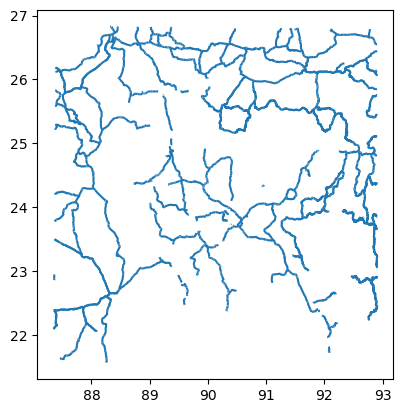

In [42]:
df_N.plot()

In [43]:
df["type"].unique()

array(['residential', 'trunk', 'primary', 'unclassified', 'service',
       'secondary', 'tertiary', 'track', 'primary_link', 'motorway',
       'footway', 'living_street', 'pedestrian', 'road', 'tertiary_link',
       'path', 'motorway_link', 'trunk_link', 'steps', 'secondary_link',
       'raceway', 'construction', 'bridleway', 'platform', 'cycleway',
       'rest_area', 'yes', 'minor', 'services', 'Lane', 'Embankment',
       'corridor', 'embankment'], dtype=object)

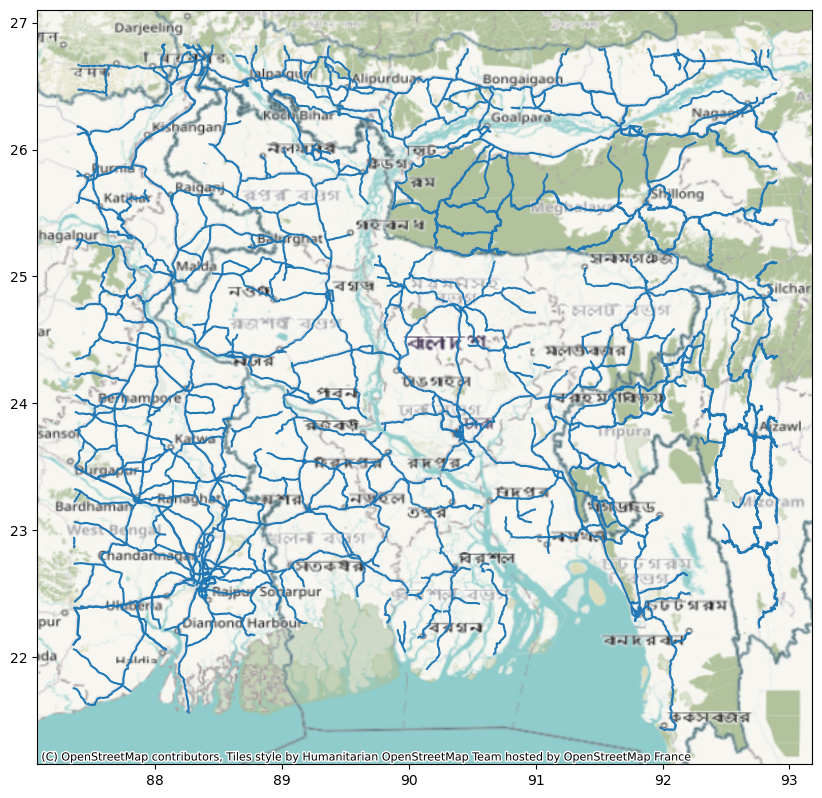

In [71]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
df_primary  =df[(df["type"]=="primary")|(df["type"]=="trunk")]
df_primary.plot(ax=ax)
cx.add_basemap(ax=ax,crs="epsg:4326")

In [67]:
main_folder_path = os.path.normpath(os.getcwd() + os.sep + os.pardir)
df_normal_data = pd.read_csv(main_folder_path + "\\data\\_roads3.csv")

gdf_normal = gpd.GeoDataFrame(df_normal_data, geometry=gpd.points_from_xy(df_normal_data.lon, df_normal_data.lat), crs="EPSG:4326")
from shapely import buffer
lines = []
for name in ["N1","N2"]:
    gdf_temp = gdf_normal[gdf_normal["road"]==name]
    line = buffer(LineString(gdf_temp["geometry"]),0.1)
    lines.append(line)

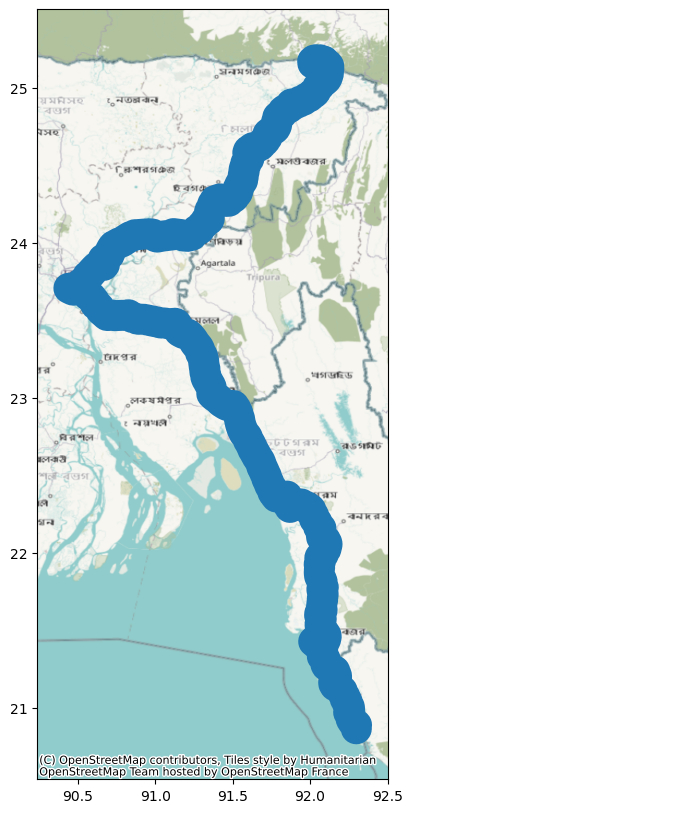

In [68]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
gpd.GeoSeries(lines,crs="4326").plot(ax=ax)
cx.add_basemap(ax=ax,crs="EPSG:4326")

In [74]:

df_primary.loc[df_primary.index[0]]

osm_id                                               10101955
name                                     Savar Kaliakoir Road
ref                                                       NaN
type                                                    trunk
oneway                                                      0
bridge                                                      0
maxspeed                                                 40.0
geometry    LINESTRING (90.2584308 23.9134548, 90.2585464 ...
Name: 20, dtype: object

In [ ]:
cross_index_N1=[]
for index in gseries.index:
    if gseries["N1"].intersects(lines[0]):
        cross_index_N1.append(index)
cross_index_N2=[]
for index in gseries.index:
    if gseries["N2"].intersects(lines[1]):
        cross_index_N2.append(index)

# intersecting_N1 =gseries[gseries.index.isin(cross_index_N1)]
# intersecting_N2 =gseries[gseries.index.isin(cross_index_N2)]
# 
# intersections_N1 =gseries["N1"].intersection(intersecting_N1).drop("N1")
# intersections_N2 =gseries["N2"].intersection(intersecting_N2).drop("N2")
# 
# gdf_N1 =gdf[gdf["road"]=="N1"]
# gdf_N2 =gdf[gdf["road"]=="N2"]

In [49]:
gdf_normal

,road,chainage,lrp,lat,lon,gap,type,name,geometry
0,N1,0.000,LRPS,23.706028,90.443333,NaN,Others,Start of Road after Jatrabari Flyover infront...,POINT (90.44333 23.70603)
1,N1,0.814,LRPSa,23.702917,90.450417,NaN,Culvert,Box Culvert,POINT (90.45042 23.70292)
2,N1,0.822,LRPSb,23.702778,90.450472,NaN,CrossRoad,Intersection with Z1101,POINT (90.45047 23.70278)
3,N1,1.000,LRP001,23.702139,90.451972,NaN,KmPost,Km post missing,POINT (90.45197 23.70214)
4,N1,2.000,LRP002,23.697889,90.460583,NaN,KmPost,Km post missing,POINT (90.46058 23.69789)
...,...,...,...,...,...,...,...,...,...
51343,Z8943,7.000,LRP007,22.429499,90.785722,NaN,KmPost,Km Post Missing,POINT (90.78572 22.42950)
51344,Z8943,8.000,LRP008,22.430110,90.776333,NaN,KmPost,Km Post Missing,POINT (90.77633 22.43011)
51345,Z8943,8.133,LRP008a,22.430249,90.774888,BS,Bridge,Start of Bridge,POINT (90.77489 22.43025)
51346,Z8943,8.151,LRP008b,22.430249,90.774860,BE,Bridge,End of Bridge,POINT (90.77486 22.43025)


In [ ]:
df_trunk = df_N[((df_N["ref"]=="N1")|(df_N["ref"]=="N2"))]#(df_N["type"]=="trunk")&

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
df_trunk.plot(ax=ax)
cx.add_basemap(crs=4326,ax=ax)
plt.show()